,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


None

genre
Non Fiction    179
Fiction        131
Childrens       40
dtype: int64

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


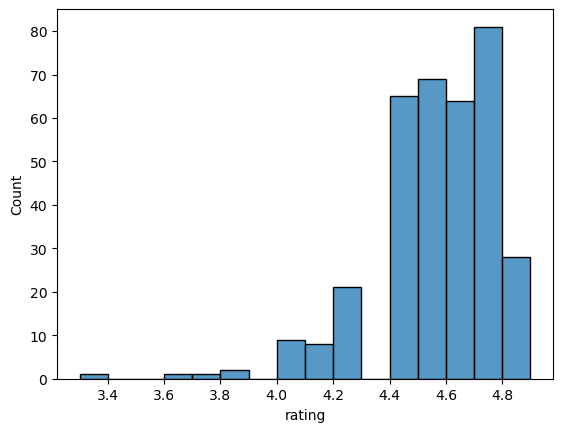

In [20]:
##################################################################
# What's the best way to approach a new dataset? 
# Validate and summarize categorical and numerical data 
# Create Seaborn visualizations to communicate all findings.
##################################################################

########################################
# Initial exploration
########################################
import pandas as pd 
import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)
books = pd.read_csv("datasets/clean_books.csv")

#First look with .head()
#Look at the different column names
display(books.head(5))

#Gathering more .info() 
#quick way to summarize the number of missing values in each column
#show the different datatypes
display(books.info())

#A closer look at categorical values
#How many data in each category
display(books.value_counts("genre"))

#.describe() numerical values
#show data included in numerical columns
display(books.describe())

#Visualize numerical data
#Histogram look at the distribution of numerical data
#it splits values into discrete bins and 
#we visualize the count of values in each bin
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=books, x="rating", binwidth=0.1)
plt.show()

In [3]:
##########################################
# Data validation | data types and range
##########################################

#Quick overview of data types
#and the number of non-missing values
display(books.info())

#if only interested in data types
display(books.dtypes)

#if not happy with a data type, change it
#and display again
books["year"] = books["year"].astype(int)
display(books.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


None

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [4]:
#Validate categorical data
#check whether the values in the genre column are limited
display(books["genre"].isin(["Fiction","Non Fiction"]))

#use the tilde operator to inverse the True/False value
display(~books["genre"].isin(["Fiction","Non Fiction"]))

#Filtering the dataframe for only values in the list
display(books[books["genre"].isin(["Fiction","Non Fiction"])])


0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction
...,...,...,...,...,...
344,Whose Boat Is This Boat?: Comments That Don't ...,The Staff of The Late Show with,4.6,2018,Non Fiction
345,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,4.4,2012,Non Fiction
346,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,2012,Fiction
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,2010,Non Fiction


,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


2009

2019

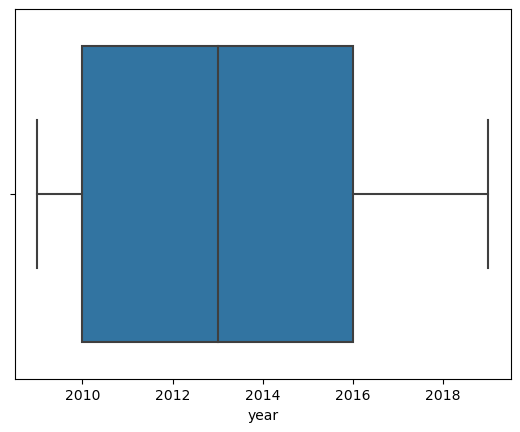

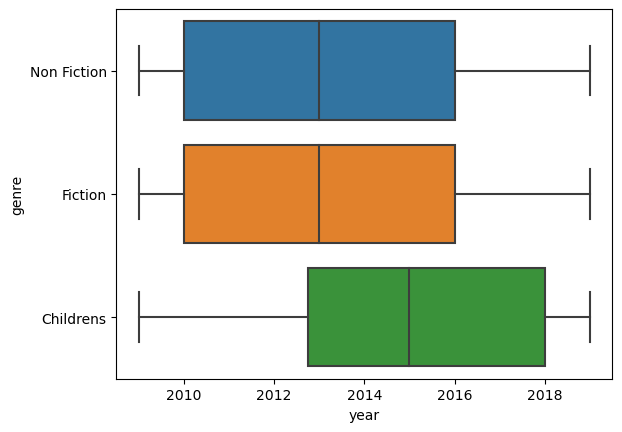

In [6]:
#Validate numerical data
#select only the numerical columns in the DataFrame
display(books.select_dtypes("number").head())

#range of the years
display(books["year"].min())
display(books["year"].max())

#More detailed distribution of year data using boxplot() 
sns.boxplot(data=books, x="year")
plt.show()

#year data grouped by a categorical variable such as genre
sns.boxplot(data=books, x="year", y="genre")
plt.show()


,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


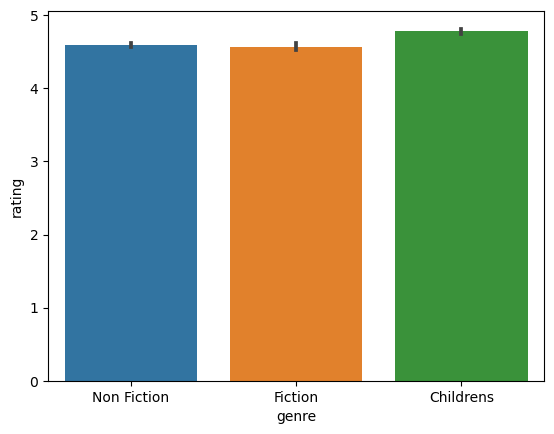

In [15]:
##########################################
# Data summarization | group and agg
##########################################
#Explore the characterics of subset further 
#with .group() with a given category
#and chain an aggregating function like .mean() or .count()
display(books.groupby("genre").mean())

#aggregate ungrouped data
#only on numerics columns
display(books.agg(["mean","std"]))

#ungrouped data, aggregations for columns using a dictionary
display(books.agg({"rating":["mean","std"],  "year":["median"]}))

#grouped data, aggregations for columns
books.groupby("genre").agg(
    mean_rating=("rating","mean"),
    std_rating=("rating","std"),
    median_year=("year","median")
)

#Visualize categorical summaries
#bar plots calculate the mean of a quantitative variable like rating 
#across grouped categorical data such as genre
#bar plots also show a 95% CI for the mean as a vertical line
sns.barplot(data=books, x="genre", y="rating")
plt.show()
